<a href="https://colab.research.google.com/github/JeanCarlosBarbosa88/JeanCarlosBarbosa88/blob/main/rede_neural_do_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf # Import tensorflow
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
transform = transforms.ToTensor()
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [ ]:
dataiter = iter(trainloader)
images, etiquetas = next(dataiter)  # Change dataiter.next() to next(dataiter)
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

In [ ]:
print (images[0].shape)#para verificar as dimensão do tensor de cada imagem
print (etiquetas[0].shape)#para verificar as dimensões do tensor de cada etiqueta

In [ ]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()# camada de entrada, 784 neurônios que se ligam a 128
        self.linear1 = nn.Linear(28*28, 128)# camada interna 1, 128 neurônios que se ligam a 64
        self.linear2 = nn.Linear(128, 64)# camada interna 2, 64 neurônios que se ligam a 10
        self.linear3 = nn.Linear(64, 10)#camada interna 2, 64 neurônios que se ligam a 10
        #para camada de saida não e necessário definir nada pois só precisamos pegar o output da camada interna 2

    def forward(self, x): # Ensure this line is indented at the same level as __init__
        x = F.relu(self.linear1(x))# função de ativiaçãoda camada de entrada para camada interna 1
        x = F.relu(self.linear2(x))# função de ativiaçãoda camada de entrada para camada interna 2
        x = self.linear3(x)#função de ativação da camada interna 2 para camada de saida, nesse caso f(x)=x
        return F.log_softmax(x, dim=1)#dados utilizados para calcular a perda

In [ ]:
def treino(modelo, trainloader, device):
    otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)#otimizador
    inicio = time()
    criterio = nn.NLLLoss()#criterio de perda
    EPOCHS = 10
    modelo.train()

    for epoch in range(EPOCHS):
        perda_acumulada = 0.0
        for images, etiquetas in trainloader:

            images = images.view(images.shape[0], -1)
            otimizador.zero_grad()
            output = modelo(images.to(device))
            perda_instantanea = criterio(output, etiquetas.to(device))
            perda_instantanea.backward()
            otimizador.step()
            perda_acumulada += perda_instantanea.item()

        else:
            print("Treino: Epoch {} - Perda Computada (média): {}".format(epoch+1, perda_acumulada/len(trainloader)))
            print("\n Tempo de treino (em minutos) = ", (time()-inicio)/60)


In [ ]:
def validacao(modelo, valloader, device):
  conta_corretas, conta_todas = 0, 0
  for images, etiquetas in valloader:
      for i in range(len(etiquetas)):
        img = images[i].view(1, 784)
        # desativar o autoarmazenamento
        with torch.no_grad():
            logps = modelo(img.to(device))
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        etiqueta_pred = probab.index(max(probab))
        etiqueta_certa = etiquetas.numpy()[i]
        if(etiqueta_certa == etiqueta_pred):
            conta_corretas += 1
            conta_todas += 1
  print("Total de imagens testadas= {}/{}".format(conta_corretas, conta_todas))
  print("\nPrecisão do modelo = {}%".format(100 * conta_corretas / conta_todas))

In [ ]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)
treino(modelo, trainloader, device)
validacao(modelo, valloader, device)

# Nova seção

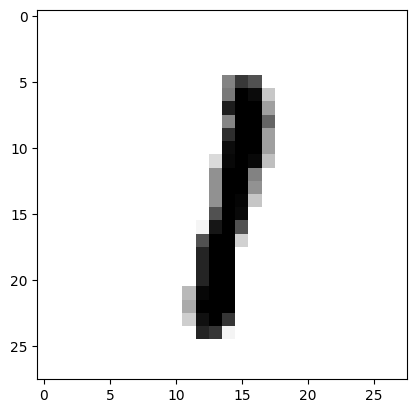

Tamanho da imagem: torch.Size([1, 28, 28])
Epoch 1, Perda média: 0.7097
Epoch 2, Perda média: 0.3152
Epoch 3, Perda média: 0.2611
Epoch 4, Perda média: 0.2227
Epoch 5, Perda média: 0.1908
Epoch 6, Perda média: 0.1655
Tempo de treino: 1.82 minutos
Precisão no conjunto de validação: 94.80%


UnidentifiedImageError: cannot identify image file '/content/bases-20240704T183510Z-001.zip'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from time import time
from PIL import Image
import numpy as np

# Definindo a transformação (pré-processamento dos dados)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Carregando os dados de treino e validação do MNIST
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)

# Visualizando uma imagem de exemplo
dataiter = iter(trainloader)
images, labels = next(dataiter)
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
plt.show()

print(f'Tamanho da imagem: {images[0].shape}')  # Verificando as dimensões

# Definindo o Modelo da Rede Neural (modelo simples de 3 camadas)
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(28*28, 128)  # Primeira camada
        self.linear2 = nn.Linear(128, 64)     # Segunda camada
        self.linear3 = nn.Linear(64, 10)      # Camada de saída (10 classes)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Achata as imagens para 1D
        x = F.relu(self.linear1(x))  # Função ReLU após a primeira camada
        x = F.relu(self.linear2(x))  # Função ReLU após a segunda camada
        x = self.linear3(x)  # Saída final sem ativação, pois vamos usar log_softmax
        return F.log_softmax(x, dim=1)  # log_softmax para calcular a probabilidade

# Função de treinamento
def treino(modelo, trainloader, device):
    otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)
    criterio = nn.NLLLoss()  # Função de perda de log-likelihood
    EPOCHS = 6
    modelo.train()

    inicio = time()

    for epoch in range(EPOCHS):
        perda_acumulada = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            otimizador.zero_grad()
            output = modelo(images)
            perda = criterio(output, labels)
            perda.backward()
            otimizador.step()
            perda_acumulada += perda.item()

        print(f"Epoch {epoch+1}, Perda média: {perda_acumulada/len(trainloader):.4f}")

    print(f'Tempo de treino: {(time()-inicio)/60:.2f} minutos')

# Função de validação
def validacao(modelo, valloader, device):
    modelo.eval()  # Coloca o modelo em modo de avaliação
    correct = 0
    total = 0
    with torch.no_grad():  # Desabilita o cálculo de gradientes para a avaliação
        for images, labels in valloader:
            images, labels = images.to(device), labels.to(device)
            output = modelo(images)
            _, predicted = torch.max(output, 1)  # Obtém a classe com maior probabilidade
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Precisão no conjunto de validação: {100 * correct / total:.2f}%')

#Função para carregar e processar imagem
def carregar_imagem (imagem_path):
  img = Image.open(imagem_path).convert('L')#converte para escala de cinza
  transform = transforms.Compose([
      transforms.Resize((28, 28)),   #redimensiona para 28x28 pixels
      transforms.ToTensor(),       #converte para tensor
      transforms.Normalize((0.5,), (0.5,))  #normalizção do MNIST
  ])
  img_tensor = transform(img)
  img_tensor = img_tensor.unsqueeze(0)
  return img_tensor

#função para revisão
def prever_imagem(modelo, imagem_tensor, device):
  imagem_tensor = carregar_imagem(imagem_path)
  imagem_tensor = imagem_tensor.to(device)

  modelo.eval() # coloca em avaliação o modelo
  with torch.no_grad():
    output = modelo(imagem_tensor)
    _, predicted = torch.max(output, 1)
    print(f'A imagem é prevista como: {predicted.item()}')

    #exibição da imagem
    img = image.open('/content/bases-20240704T183510Z-001.zip').convert('L')
    plt.imshow(img, cmap='gray')
    plt.title(f'Predição: {predicted.item()}')
    plt.show()

modelo = Modelo

# Definindo o dispositivo (GPU ou CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo = Modelo().to(device)

# Chamando as funções de treinamento e validação
treino(modelo, trainloader, device)
validacao(modelo, valloader, device)

#testar nova imagem
imagem_path = '/content/bases-20240704T183510Z-001.zip'
prever_imagem(modelo, imagem_path, device)

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


In [ ]:
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Para 3 canais (RGB)


In [ ]:
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(7*7*64, 128)  # Aqui o número depende da imagem após convolução
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 7*7*64)  # Flattening
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [ ]:
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)


In [ ]:
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

In [ ]:
otimizador = optim.Adam(modelo.parameters(), lr=0.001)

In [ ]:
criterio = nn.CrossEntropyLoss()  # Para problemas com múltiplas classes

In [ ]:
EPOCHS = 10  # Altere o número conforme necessário